In [1]:
# widen jupyter notebook window
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

# check environment
import os
print(f'Conda Environment: ' + os.environ['CONDA_DEFAULT_ENV'])

Conda Environment: rapids-0.19


In [2]:
import matplotlib.pyplot as plt

import numpy as np
import torch

import scipy.io
import scipy.interpolate

import sklearn

from tqdm.notebook import tqdm

import copy
import time
import gc
from pathlib import Path

In [4]:
import sys
sys.path.append("/n/data1/hms/neurobio/sabatini/rich/github_repos/")
# sys.path.append("/media/rich/Home_Linux_partition/github_repos/")

%load_ext autoreload
%autoreload 2
from basic_neural_processing_modules import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# dir_allExpDirs = Path('/n/data1/hms/neurobio/sabatini/rich/data/res2p/round_5_experiments/mouse_2_6/scanimage/').resolve()
dir_allExpDirs = Path('/media/rich/bigSSD/res2p/scanimage data/round 5 experiments/mouse 2_6/just_stat_files').resolve()

dir_allNeuralData = Path('/media/rich/bigSSD/analysis_data/mouse 2_6/cascade_output').resolve()

import experiment files

In [6]:
paths_exp = path_helpers.get_numeric_contents(dir_allExpDirs, sort=True)[0]
del paths_exp[0:2]
del paths_exp[-1]

In [8]:
expParams = [ scipy.io.loadmat(path / "expParams.mat", simplify_cells=True)['expParams'] for path in paths_exp ]
trialStuff = [ scipy.io.loadmat(path / "analysis_lastNight/trialStuff.mat", simplify_cells=True)['trialStuff'] for path in paths_exp ]
loggers = [scipy.io.loadmat(path / "logger_aligned.mat", simplify_cells=True)['logger_aligned'] for path in paths_exp ]
# logger = [ scipy.io.loadmat(path / "logger.mat", simplify_cells=True)['logger'] for path in paths_exp ]

import neural data

In [10]:
paths_ND = path_helpers.get_numeric_contents(dir_allNeuralData, sort=True)[0]
del paths_ND[0]

In [11]:
neuralData = [ np.load(path) for path in paths_ND]

In [12]:
[loggers[ii]['timeSeries'].shape for ii in range(len(loggers))]

[(108000, 33),
 (108000, 33),
 (108000, 33),
 (108000, 33),
 (108000, 33),
 (108000, 33),
 (108000, 33)]

In [14]:
len(neuralData)

8

In [6]:
trialStuff['condTrials']

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1,

In [25]:
logger.keys()

dict_keys(['timeSeries', 'timers', 'decoder', 'motionCorrection', 'trials'])

In [12]:
trialNums = [ logger['timeSeries'][:,28] for logger in loggers ]
trialStarts_bool = [ np.diff(ii) for ii in trialNums ]

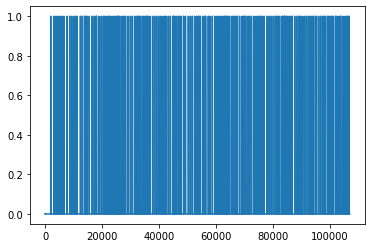

In [67]:
%matplotlib inline
plt.figure()
# plt.plot(logger[0]['timeSeries'][:,28]);
plt.plot(np.diff(logger[0]['timeSeries'][:,28]));
# plt.ylim(0,200)

In [50]:
3

3

In [47]:
expParams['loggerNames']['timeSeries'][25:30]

array(['NumOfRewardsAcquired', 'NumOfTimeouts', 'image_hash', 'trialNum',
       'fakeFeedback_inUse'], dtype=object)

In [9]:
expParams

{'frameRate': 30,
 'duration_session': 108000,
 'duration_trial': 20,
 'win_smooth': 4,
 'duration_threshold': 0.066,
 'threshold_value': 1.35,
 'range_cursor': array([-1.35,  1.35]),
 'range_freqOutput': array([ 1000, 18000], dtype=uint16),
 'voltage_at_threshold': 3.1,
 'duration_timeout': 4,
 'numCells': 1005,
 'directory': 'D:\\RH_local\\data\\scanimage data\\round 5 experiments\\mouse 2_6\\20210410',
 'duration_rollingStats': 1800,
 'subSampleFactor_runningVals': 1,
 'threshold_quiescence': 0,
 'duration_rewardTone': 1.5,
 'duration_ITI_success': 1,
 'duration_rewardDelivery': 0.2,
 'reward_duration': 50,
 'reward_delay': 0,
 'LED_duration': 0.2,
 'LED_ramp_duration': 0.1,
 'numFramesToAvgForMotionCorr': 10,
 'image_hash_function': 'hash = sum(sum(image,1).^2)',
 'loggerNames': {'timeSeries': array(['counter_frameNum', 'CS_quiescence', 'ET_trialStart', 'CE_trial',
         'soundVolume', 'counter_trialIdx', 'CS_threshold',
         'ET_rewardToneHold', 'CE_rewardToneHold', 'counte